## Code used for Taylor et al. (2024)
### Chapter 6
### 'Confined overbank development: Controls on sediment accumulation and distribution in tectonically active slope settings'


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

%matplotlib inline

In [3]:
df = pd.read_csv('data/ainsa_pc.csv') # load data, 

bins = 24 ## Set how many bins
col_dir = 'direction' ## Column name containing the paleocurrent directions
sns.set_style("whitegrid")

df[col_dir] = df[col_dir].astype('int')

# BII
BII = df[(df.subunit == 'BII')]
BII_ripples = df[(df.subunit == 'BII') & (df.type == 'ripples')]
BII_flutes = df[(df.subunit == 'BII') & (df.type == 'flutes')]
BII_grooves = df[(df.subunit == 'BII') & (df.type == 'grooves')] 


#BIII
BIII = df[(df.subunit == 'BIII')]
BIII_ripples = df[(df.subunit == 'BIII') & (df.type == 'ripples')]
BIII_flutes = df[(df.subunit == 'BIII') & (df.type == 'flutes')]
BIII_grooves = df[(df.subunit == 'BIII') & (df.type == 'grooves')] 

#BIV
BIV = df[(df.subunit == 'BIV')]
BIV_ripples = df[(df.subunit == 'BIV') & (df.type == 'ripples')]
BIV_flutes = df[(df.subunit == 'BIV') & (df.type == 'flutes')]
BIV_grooves = df[(df.subunit == 'BIV') & (df.type == 'grooves')] 





In [4]:
#Conversion to rose-diagram input

directions = df[col_dir].to_numpy()

bin_int = 360/bins

bin_classes = []
binn = []
counts = []
counts_perc = []

for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
    
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts)*100)

# All Data

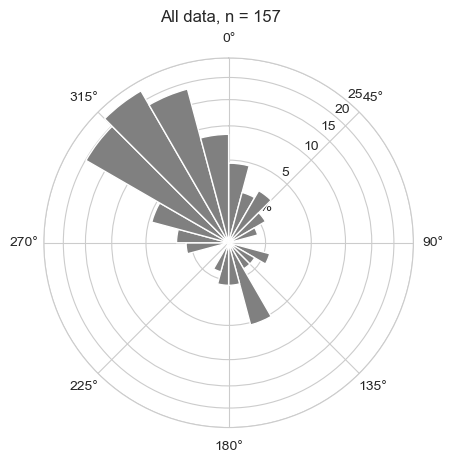

In [5]:
# Plotting with equal area
### Ploting with dataset-dependent radius
    
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color='grey') #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise

ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

plt.show()

In [6]:
## Convert measurement types to general classes
print(df['type'].unique())
df.loc[df['type'].str.contains('grooves'), 'type_gen'] = 'grooves'
df.loc[df['type'].str.contains('ripples'), 'type_gen'] = 'ripples'
df.loc[df['type'].str.contains('flutes'), 'type_gen'] = 'flutes'
print(df['type_gen'].unique())

imbrication_dir = df[df['type_gen'].str.contains('imbrication')][col_dir].to_numpy()
ripple_dir = df[df['type_gen'].str.contains('ripples')][col_dir].to_numpy()
flute_dir = df[df['type_gen'].str.contains('flutes')][col_dir].to_numpy()
bin_int = 360/bins

['ripples' 'grooves' 'flutes']
['ripples' 'grooves' 'flutes']


# BII

Grooves, n = 14
Flutes, n = 11
Ripples, n = 44


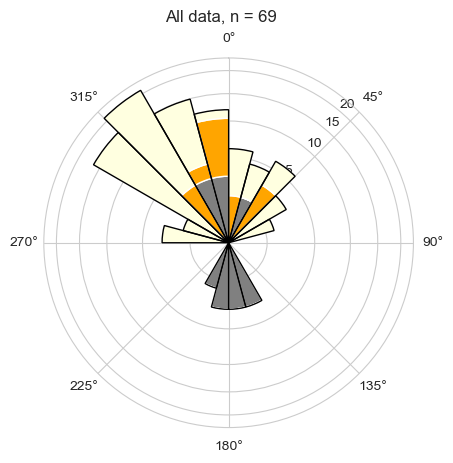

In [7]:
#### AXIS 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = BII.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 1
directions = BII_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 2
directions = BII_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Flutes, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 3
directions = BII_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class


plt.show()
fig.savefig('figs/ainsa_palaeocurrents_BII.eps')

# BIII

Grooves, n = 4
Flutes, n = 4
Ripples, n = 34


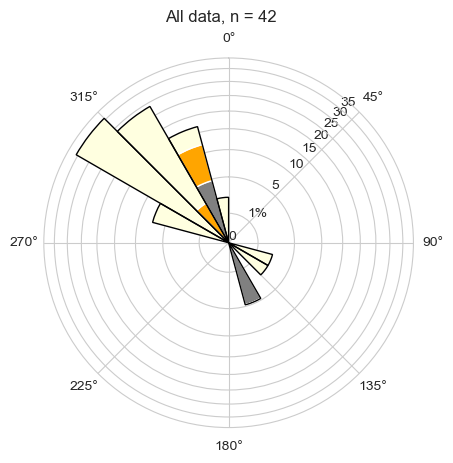

In [8]:
#### MARGIN 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = BIII.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = BIII_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = BIII_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Flutes, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = BIII_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha=1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class

plt.show()
fig.savefig('figs/ainsa_palaeocurrents_BIII.eps')

# BIII

Grooves, n = 12
Grooves, n = 10
Ripples, n = 24


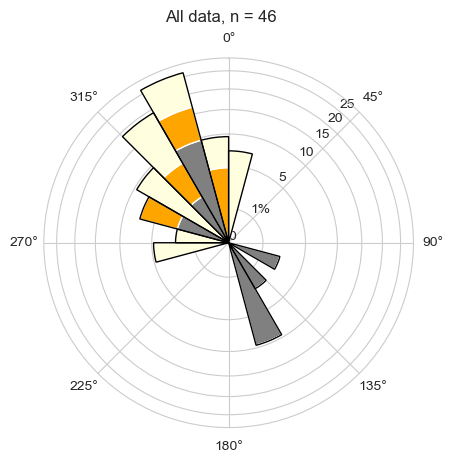

In [9]:
#### BIV 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = BIV.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = BIV_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = BIV_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = BIV_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class




plt.show()
fig.savefig('figs/ainsa_palaeocurrents_BIV.eps')

Grooves, n = 4
Grooves, n = 4
Ripples, n = 34


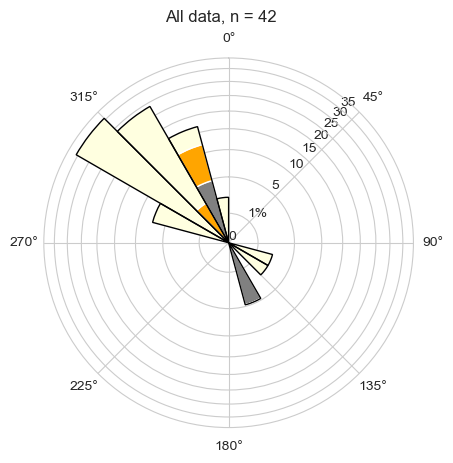

In [10]:
#### BIII 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = BIII.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = BIII_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = BIII_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = BIII_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class




plt.show()
fig.savefig('figs/ainsa_palaeocurrents_BIV.eps')

Grooves, n = 14
Grooves, n = 11
Ripples, n = 44


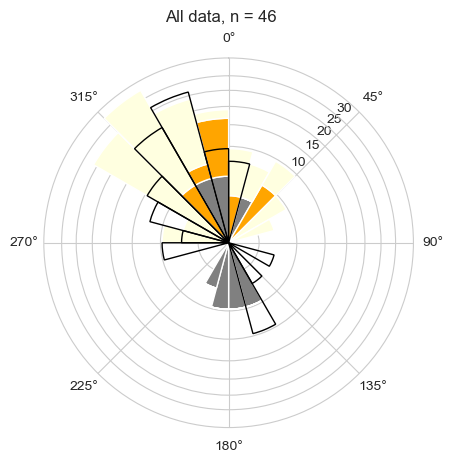

In [11]:
#### BII 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = BIV.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = BII_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = BII_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = BII_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class




plt.show()
fig.savefig('figs/ainsa_palaeocurrents_BIV.eps')